In [1]:
import torch
import torchvision
import numpy as np
import os
import shutil

In [2]:
from MovingMNIST import MovingMNIST
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler
np.random.seed(0)
torch.manual_seed(0)

In [3]:
batch_size = 4

In [12]:
# Create dataloaders for train and test dataset
train_set = MovingMNIST(
    root="../data/",
    train=True,
    download=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    ),
    target_transform=transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    ),
)

test_set = MovingMNIST(
    root="../data/",
    train=False,
    download=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    ),
    target_transform=transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    ),
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=batch_size,
    # sampler=train_sampler,
    num_workers=1,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=batch_size,
    # sampler=test_sampler,
    num_workers=1,
)

In [14]:
for idx, batch in enumerate(train_loader):
    images, labels = batch[0], batch[1]
    break

In [21]:
type(images[0][1]), type(labels[0][1])

(torch.Tensor, torch.Tensor)

#################################

In [26]:
train_folders_size = 11000
test_folders_size = 2000

In [28]:
train_folders = os.listdir(FFP_DATASET_PATH)[:train_folders_size]
test_folders = os.listdir(FFP_DATASET_PATH)[train_folders_size:]

In [29]:
set(train_folders) != set(test_folders)

True

In [31]:
for fol in train_folders:
    original = f"{FFP_DATASET_PATH}/{fol}"
    target = f"{FFP_DATASET_PATH}/train/{fol}"
    shutil.move(original, target)

In [32]:
for fol in test_folders:
    original = f"{FFP_DATASET_PATH}/{fol}"
    target = f"{FFP_DATASET_PATH}/test/{fol}"
    shutil.move(original, target)

In [34]:
from os.path import join
from os import listdir, rmdir
from shutil import move

root = f"{FFP_DATASET_PATH}"
for filename in listdir(join(root, 'train')):
    move(join(root, 'train', filename), join(root, filename))
rmdir(join(root, 'train'))

In [35]:
root = f"{FFP_DATASET_PATH}"
for filename in listdir(join(root, 'test')):
    move(join(root, 'test', filename), join(root, filename))
rmdir(join(root, 'test'))

In [37]:
import torch.utils.data as data
from PIL import Image
import os
import os.path
import errno
import numpy as np
import torch
import codecs


class MovingObjects(data.Dataset):
    """`MovingMNIST <http://www.cs.toronto.edu/~nitish/unsupervised_video/>`_ Dataset.

    Args:
        root (string): Root directory of dataset where ``unlabeled/train``
            and  ``unlabeled/test`` exist.
        transform (callable, optional): A function/transform that takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in an PIL
            image and returns a transformed version. E.g, ``transforms.RandomCrop``
    """

    def __init__(self, root, split=0.8, transform=None, target_transform=None, split_train_test=False):
        self.root = os.path.expanduser(root)
        self.transform = transform
        self.target_transform = target_transform
        self.split = split
        self.split_train_test = split_train_test
        
        if os.path.isdir(f"{self.root}/train") and self.split_train_test:
            for filename in listdir(join(self.root, 'train')):
                move(join(self.root, 'train', filename), join(self.root, filename))
            rmdir(join(self.root, 'train'))
        if os.path.isdir(f"{self.root}/test") and self.split_train_test:
            for filename in listdir(join(self.root, 'test')):
                move(join(self.root, 'test', filename), join(self.root, filename))
            rmdir(join(self.root, 'test'))
            
        if self.split_train_test:
            num_videos = len(os.listdir(self.root))
            train_folders_size = int(split*num_videos)
            train_folders = os.listdir(self.root)[:train_folders_size]
            test_folders = os.listdir(self.root)[train_folders_size:]
            
            for fol in train_folders:
                original = f"{self.root}/{fol}"
                target = f"{self.root}/train/{fol}"
                shutil.move(original, target)
            for fol in test_folders:
                original = f"{self.root}/{fol}"
                target = f"{self.root}/test/{fol}"
                shutil.move(original, target)
            

    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (seq, target) where sampled sequences are splitted into a seq
                    and target part
        """

        # need to iterate over time
        def _transform_time(data):
            new_data = None
            for i in range(data.size(0)):
                img = Image.fromarray(data[i].numpy(), mode='L')
                new_data = self.transform(img) if new_data is None else torch.cat([self.transform(img), new_data], dim=0)
            return new_data

        if self.train:
            seq, target = self.train_data[index, :11], self.train_data[index, 11:]
        else:
            seq, target = self.test_data[index, :11], self.test_data[index, 11:]

#         if self.transform is not None:
#             seq = _transform_time(seq)
#         if self.target_transform is not None:
#             target = _transform_time(target)

#         return seq, target

    def __len__(self):
        pass

In [5]:
FFP_DATASET_PATH = "../../../Dataset_Student/unlabeled"


In [41]:
MovingObjects(root=FFP_DATASET_PATH, split_train_test=True)

In [80]:
import os
import torch
from torch.utils.data import Dataset
import torchvision.utils as vutils
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        # Get the list of folder names in the root directory
        self.folder_names = os.listdir(self.root_dir)
        
    def __len__(self):
        # Return the number of folders in the root directory
        return len(self.folder_names)
    
    def __getitem__(self, index):
        # Get the folder name corresponding to the given index
        folder_name = self.folder_names[index]
        
        # Get the list of image filenames in the folder
        image_filenames = os.listdir(os.path.join(self.root_dir, folder_name))
        image_filenames.sort(key= lambda i: int(i.lstrip('image_').rstrip('.png')))
        
        # Load the input images and target images into separate tensors
        input_images = []
        target_images = []
        for i, image_filename in enumerate(image_filenames):
            image_path = os.path.join(self.root_dir, folder_name, f"image_{i}.png")
            image = Image.open(image_path).convert('RGB')
            if self.transform is not None:
                image = self.transform(image)
            if i < 11:
                # print(f"{image_filename} going in input")
                input_images.append(image)
            else:
                # print(f"{image_filename} going in target")
                target_images.append(image)
        
        # Convert the input and target image lists to tensors
        input_tensor = torch.stack(input_images)
        target_tensor = torch.stack(target_images)
        
        return input_tensor, target_tensor


In [81]:
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((80, 120)),
    transforms.ToTensor(),
])

train_dataset = CustomImageDataset(root_dir=f'{FFP_DATASET_PATH}/train/', transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)


In [82]:
batch_images, batch_targets = next(iter(train_dataloader))

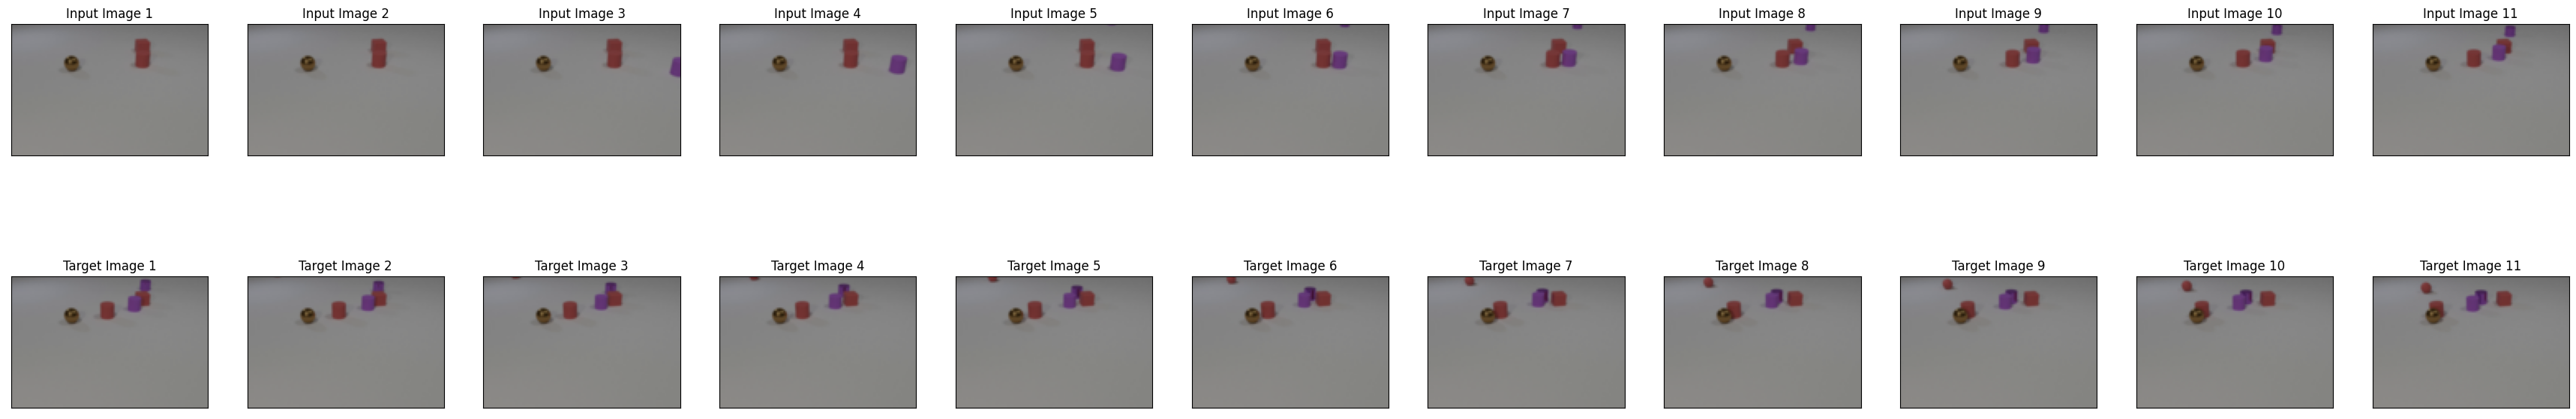

In [83]:
import matplotlib.pyplot as plt

# Create a figure with 22 subplots
fig, axs = plt.subplots(nrows=2, ncols=11, figsize=(44, 8))

# Loop over the subplots and plot the images
for i in range(11):
    # Plot the first vector
    axs[0, i].imshow(np.transpose(batch_images[0][i], (1, 2, 0)))
    axs[0, i].set_title('Input Image ' + str(i+1))
    
    # Plot the second vector
    axs[1, i].imshow(np.transpose(batch_targets[0][i], (1, 2, 0)))
    axs[1, i].set_title('Target Image ' + str(i+1))
    
    # Remove the x and y ticks
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

# Show the plot
plt.show()


In [3]:
! pwd

/Users/charvigupta/Desktop/DL/testing/Video-Frame-Prediction/src


In [4]:
! ls ../../../

Dataset_Student                  future-frame-prediction
Dataset_Student_V2.zip           hidden_set_for_leaderboard_1.zip
NYU_Deep_Learning_Spring2023     pytorch-Deep-Learning
example_hidden.zip               testing


In [7]:
ffp_dataset = torchvision.datasets.ImageFolder(
    root=FFP_DATASET_PATH,
    transform=transforms.Compose(
            [
                transforms.ToTensor(),
            ]
        ),
    )

In [8]:
len(ffp_dataset)

286000

In [44]:
batch_size = 4
train_dataset, test_dataset = random_split(ffp_dataset, (242000, 44000))


In [45]:
train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        # sampler=train_sampler,
        num_workers=1,
    )

In [46]:
test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        # sampler=test_sampler,
        num_workers=1,
    )

test_iter = iter(test_loader)

In [47]:
# if True:
        # os.makedirs(os.path.join(os.getcwd(), "logs"), exist_ok=True)
        # global_logger = init_log("global", level=logging.INFO)
        # add_file_handler("global", os.path.join(os.getcwd(), "logs", "train.log"), level=logging.DEBUG)

print("==>>> Total training batches: {}".format(len(train_loader)))
print("==>>> Total testing batches: {}".format(len(test_loader)))

        # writer = SummaryWriter(os.path.join(".", board_path))

==>>> Total training batches: 60500
==>>> Total testing batches: 11000


In [49]:
for idx, batch in enumerate(train_loader):
    print(type(batch))
    break

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/charvigupta/.pyenv/versions/dls-assignment/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/charvigupta/.pyenv/versions/dls-assignment/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/charvigupta/.pyenv/versions/dls-assignment/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/charvigupta/.pyenv/versions/dls-assignment/lib/python3.10/site-packages/torch/utils/data/dataset.py", line 290, in __getitem__
    return self.dataset[self.indices[idx]]
  File "/Users/charvigupta/.pyenv/versions/dls-assignment/lib/python3.10/site-packages/torchvision/datasets/folder.py", line 234, in __getitem__
    target = self.target_transform(target)
  File "/Users/charvigupta/.pyenv/versions/dls-assignment/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 94, in __call__
    img = t(img)
  File "/Users/charvigupta/.pyenv/versions/dls-assignment/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 134, in __call__
    return F.to_tensor(pic)
  File "/Users/charvigupta/.pyenv/versions/dls-assignment/lib/python3.10/site-packages/torchvision/transforms/functional.py", line 138, in to_tensor
    raise TypeError(f"pic should be PIL Image or ndarray. Got {type(pic)}")
TypeError: pic should be PIL Image or ndarray. Got <class 'int'>
